In [18]:
import json
import requests
import csv
import pandas as pd
import openweathermapy.core as ow
import matplotlib.pyplot as plt
from config import *
from citipy import citipy
from geopy.distance import vincenty, great_circle
import random
import time

owm_settings = {"units": "imperial", "appid": OWM_KEY}

In [5]:
#Load OWM city list json file
owm_city_json = json.load(open('city.list.json', encoding='utf8'))

In [19]:
#WORKING#

city_count = 500
counter = 0

rangeLat = (-90, 90)
rangeLong = (-180, 180)

latitudes = []
longitudes = []

cities = []

start_time = time.time()
while counter != city_count:
    rand_lat = round(random.uniform(*rangeLat), 5)
    rand_long = round(random.uniform(*rangeLong), 5)
    rand_coord = (rand_lat, rand_long)
    city = citipy.nearest_city(rand_lat, rand_long)
    name = city.city_name
    country = city.country_code
    
    city_coord = ''
    for x in owm_city_json:
        if x['name'] == name.title() and x['country'] == country.upper():
            city_coord = (x['coord']['lat'], x['coord']['lon'])
            owm_id = x['id']
            lat = x['coord']['lat']
            long = x['coord']['lon']
            
    if city_coord != '' and owm_id not in cities:
        distance = vincenty(rand_coord, city_coord).miles #using vincenty since it's more accurate than great_circle, errors when handling antipodes is not an issue here since the closest city to any given coord will not be an antipode
        if distance <= 69: #at equator, each line of latitude is approximately 69 miles from the next line, same for longitude.  Eliminating random points that have no nearby city within one degree of lat/long
            cities.append(owm_id)
            counter = counter + 1

            latitudes.append(lat)
            longitudes.append(long)

            
print(time.time() - start_time)

218.51691436767578


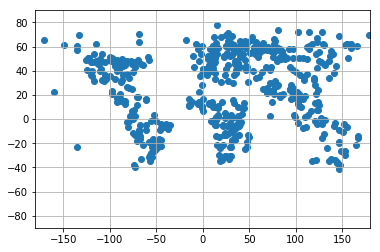

In [21]:
plt.scatter(longitudes, latitudes)
plt.xlim(rangeLong)
plt.ylim(rangeLat)
plt.grid()
plt.show()

In [26]:
test = pd.Series(cities)
test[test.duplicated()]

Series([], dtype: int64)

In [34]:
#print(cities)
#['iqaluit', 'worland', 'mlonggo', 'bayir', 'college', 'choix', 'the pas', 'tlacotalpan', 'glace bay', 'port jervis']

#NOTE: Need to compare cities to the openweathermap city.list.json when pulling cities
#Only return cities in the OWM list
#For example, "bayir" returns no city from OWM

#NOTE: May also need to figure out a way to handle cities like "college" which have multiple macthes in the OWM list

#NOTE: Could also pull the city 'id' from OWM for use with API later (not necessary though)

#NOTE: Once city list is generated, write to csv to save names and avoid having to call citipy/geopy when re-running

#WARNING: Must solve for "GeocoderTimedOut: Service timed out"

#Time w/ great_circle: 41, 53, 66 seconds